# Milestone 1

In this notebook, we perform an Exploratory Data Analysis with some basic statistics to set up the goals and assess the feasibility of our project.

In [1]:
# Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
# mpl.rcParams['figure.dpi']= 300
sns.set()

---

## Dataset
We use a [dataset](https://www.kaggle.com/datasets/rounakbanik/pokemon) available on Kaggle, containing information about 801 pokemons...

The pokemons are ordered following the pokedex number, so we choose to set it as the id of the dataframe.

### Features description
| Column name | Description | Type |
| ----------- | ----------- | ---- |
| name | The English name of the Pokemon | string |
| japanese_name | The Original Japanese name of the Pokemon | string |
| pokedex_number | The entry number of the Pokemon in the National Pokedex | int |
| percentage_male | The percentage of the species that are male. Blank if the Pokemon is genderless. | float |
| type1 | The Primary Type of the Pokemon | string |
| type2 | The Secondary Type of the Pokemon | string |
| classification | The Classification of the Pokemon as described by the Sun and Moon Pokedex |
| height_m | Height of the Pokemon in metres | float |
| weight_kg | The Weight of the Pokemon in kilograms | float |
| capture_rate | Capture Rate of the Pokemon | int |
| base_egg_steps | The number of steps required to hatch an egg of the Pokemon | int |
| abilities | A stringified list of abilities that the Pokemon is capable of having |
| experience_growth | The Experience Growth of the Pokemon | int |
| base_happiness | Base Happiness of the Pokemon | int |
| against_ | Eighteen features that denote the amount of damage taken against an attack of a particular type | float |
| hp | The Base HP of the Pokemon | int |
| attack | The Base Attack of the Pokemon | int |
| defense | The Base Defense of the Pokemon | int |
| sp_attack | The Base Special Attack of the Pokemon | int |
| sp_defense | The Base Special Defense of the Pokemon | int |
| speed | The Base Speed of the Pokemon | int |
| generation | The numbered generation which the Pokemon was first introduced | int |
| is_legendary | Denotes if the Pokemon is legendary | int |

In [2]:
# Load data
pd.set_option('display.max_columns', None) # display all columns
pokemons = pd.read_csv('../pokemon.csv')
pokemons.set_index('pokedex_number', inplace=True) # set pokedex_number as id
pokemons.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
pokedex_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,65,65,45,grass,poison,6.9,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,80,80,60,grass,poison,13.0,1,0
3,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,122,120,80,grass,poison,100.0,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,60,50,65,fire,NaN,8.5,1,0
5,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,80,65,80,fire,NaN,19.0,1,0


In [3]:
print(f"There are {len(pokemons)} different pokemons with {len(pokemons.columns)} different features (columns) in the dataset.")

There are 801 different pokemons with 40 different features (columns) in the dataset.


---

## Problematic


---

## Exploratory Data Analysis (EDA)

In [4]:
print(f"{pokemons['is_legendary'].mean():.2%} of pokemons are legendary.")

8.74% of pokemons are legendary.


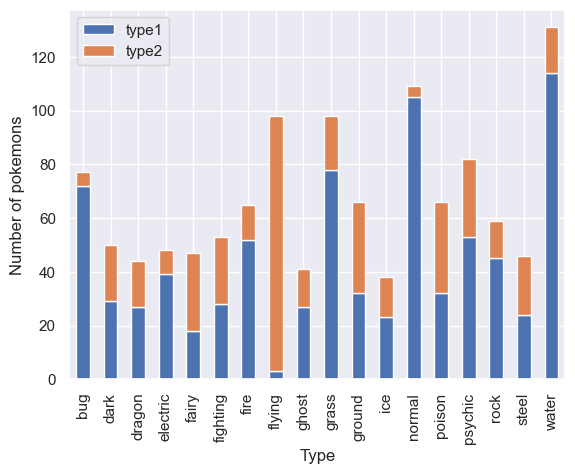

In [5]:
types = pd.DataFrame({'type1': pokemons['type1'].value_counts().sort_index(),
                      'type2': pokemons['type2'].value_counts().sort_index()})
types.plot.bar(stacked=True)
plt.xlabel('Type')
plt.ylabel('Number of pokemons')
plt.show()

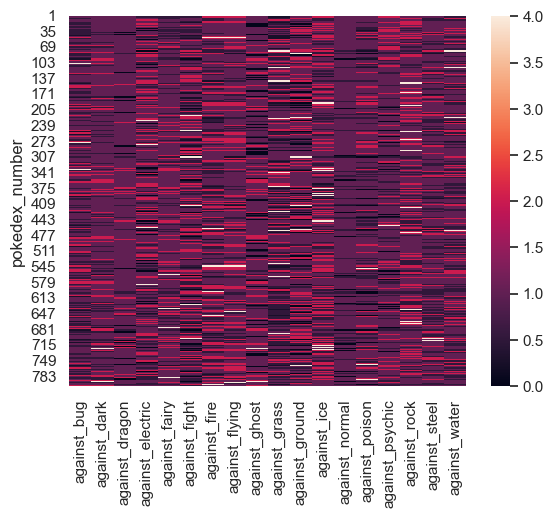

In [6]:
sns.heatmap(pokemons.filter(like='against_'))
plt.show()

**Comments**: The types dragon and normal are globally resistant to all the pokemons.

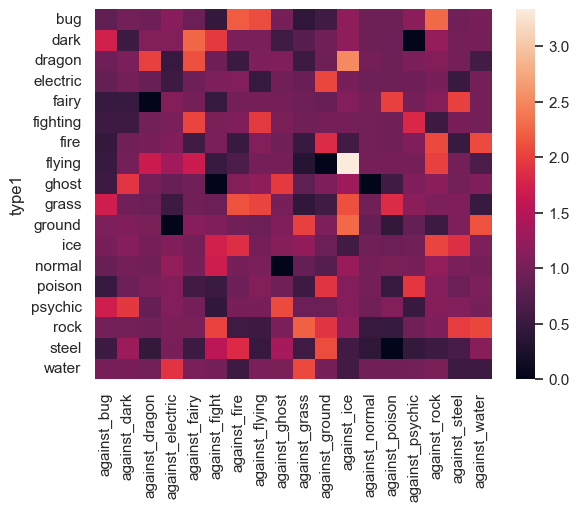

In [7]:
sns.heatmap(pokemons.groupby('type1').mean().filter(like='against_'))
plt.show()

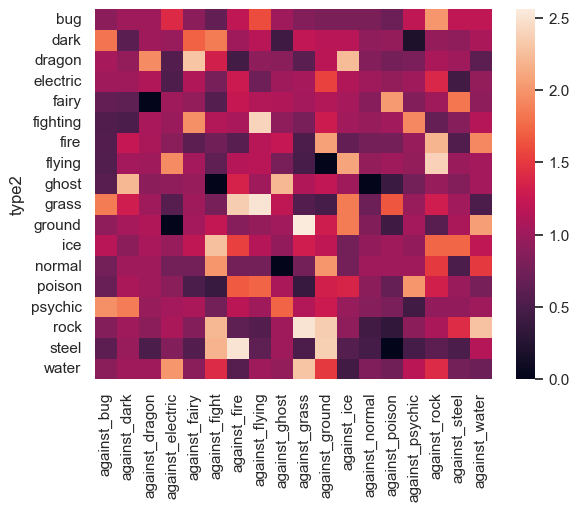

In [8]:
sns.heatmap(pokemons.groupby('type2').mean().filter(like='against_'))
plt.show()

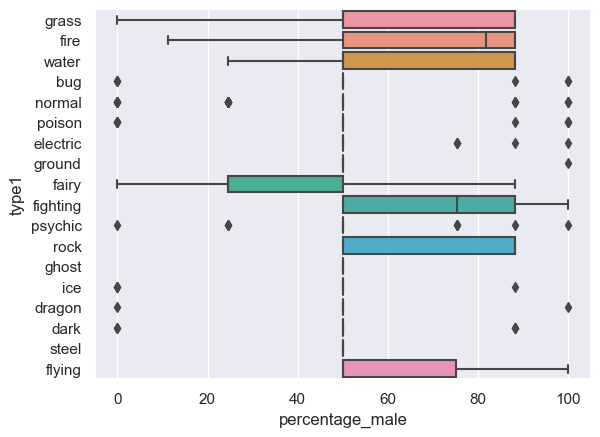

In [9]:
sns.boxplot(data=pokemons, x='percentage_male', y='type1')
plt.show()

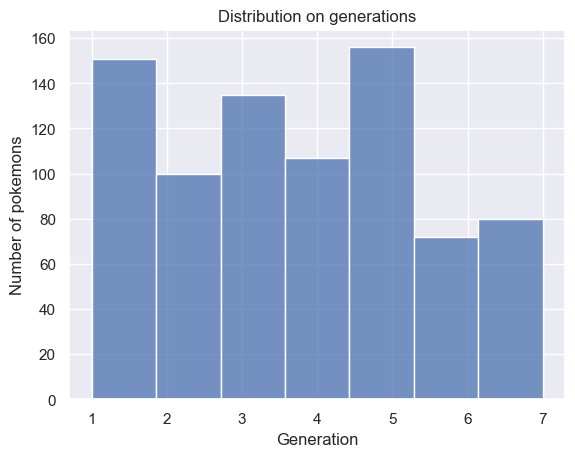

In [10]:
sns.histplot(pokemons['generation'], stat='count', bins=7)
plt.title('Distribution on generations')
plt.xlabel('Generation')
plt.ylabel('Number of pokemons')
plt.show()

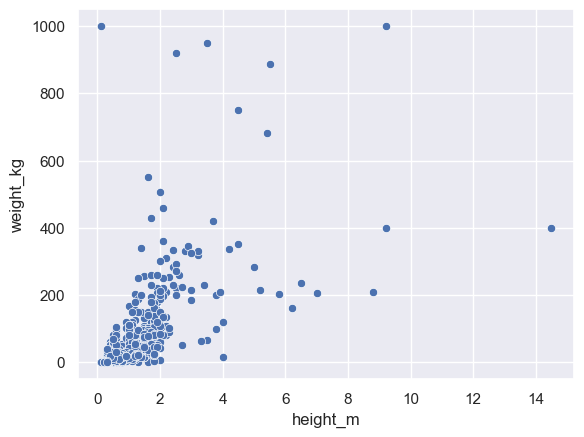

In [11]:
sns.scatterplot(data=pokemons, x='height_m', y='weight_kg')
plt.show()

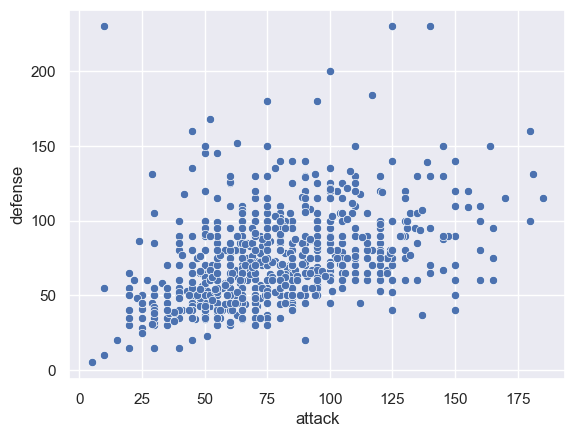

In [12]:
sns.scatterplot(data=pokemons, x='attack', y='defense')
plt.show()

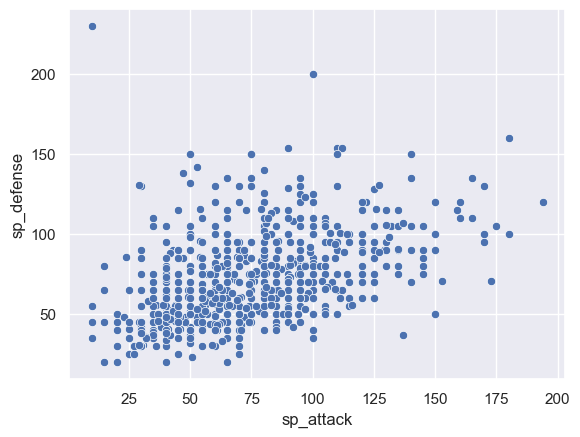

In [13]:
sns.scatterplot(data=pokemons, x='sp_attack', y='sp_defense')
plt.show()

In [14]:
pokemons['base_happiness'].value_counts().sort_index()

0       36
35      69
70     667
90       5
100     14
140     10
Name: base_happiness, dtype: int64

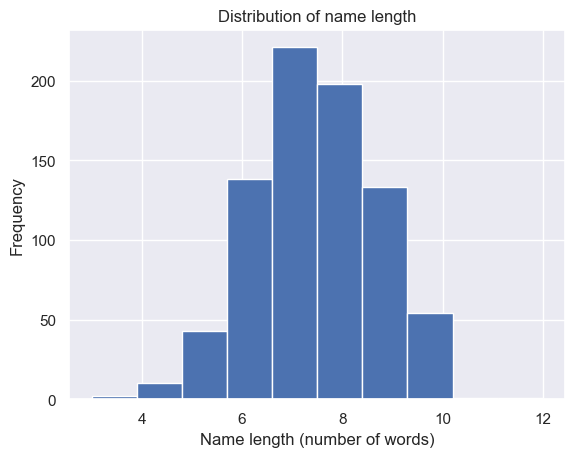

In [15]:
plt.title('Distribution of name length')
plt.xlabel('Name length (number of words)')
plt.ylabel('Number of pokemons')
pokemons.apply(lambda x: len(x['name']), axis=1).plot.hist()
plt.show()

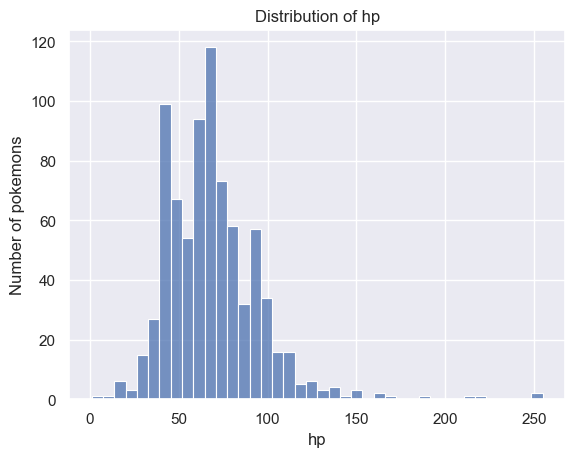

In [16]:
sns.histplot(pokemons['hp'], stat='count')
plt.title('Distribution of hp')
plt.ylabel('Number of pokemons')
plt.show()

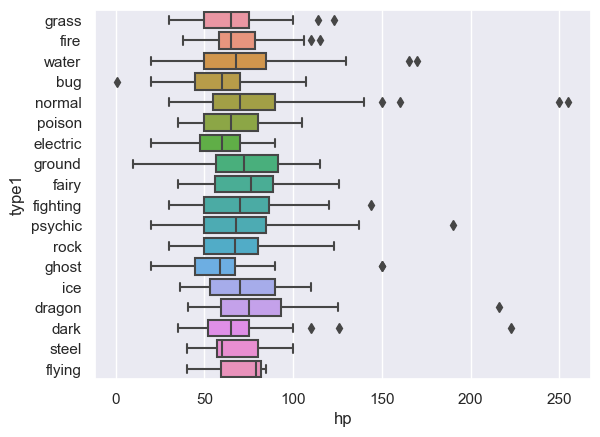

In [17]:
sns.boxplot(data=pokemons, x='hp', y='type1')
plt.show()

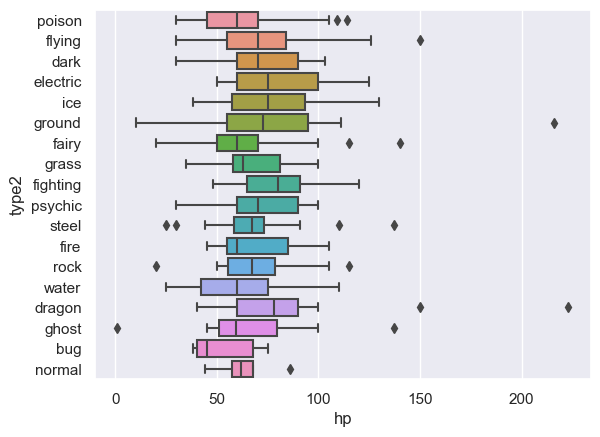

In [18]:
sns.boxplot(data=pokemons, x='hp', y='type2')
plt.show()

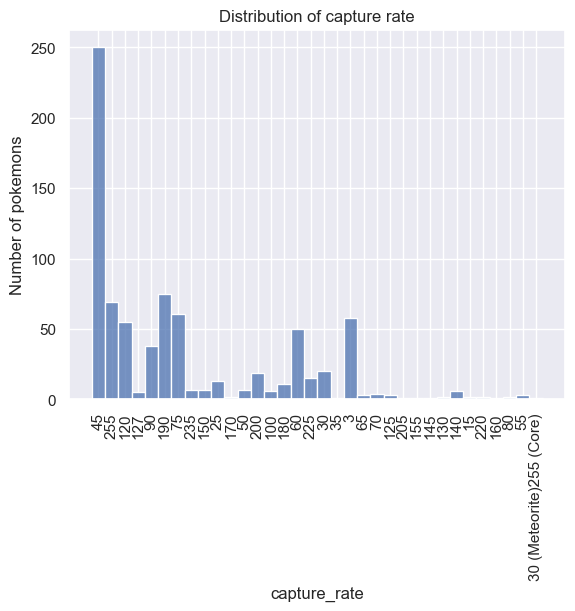

In [19]:
sns.histplot(pokemons['capture_rate'], stat='count')
plt.title('Distribution of capture rate')
plt.ylabel('Number of pokemons')
plt.tick_params(axis='x', rotation=90)
plt.show()

In [20]:
# This pokemon has two different capture_rate
pokemons[pokemons['capture_rate']=='30 (Meteorite)255 (Core)']

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
pokedex_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
774,['Shields Down'],0.5,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0,0.5,0.5,1.0,2.0,2.0,2.0,100,6400,70,500,30 (Meteorite)255 (Core),Meteor Pokémon,60,1059860,0.3,60,Metenoメテノ,Minior,NaN,100,60,120,rock,flying,40.0,7,0


---

## Related Works